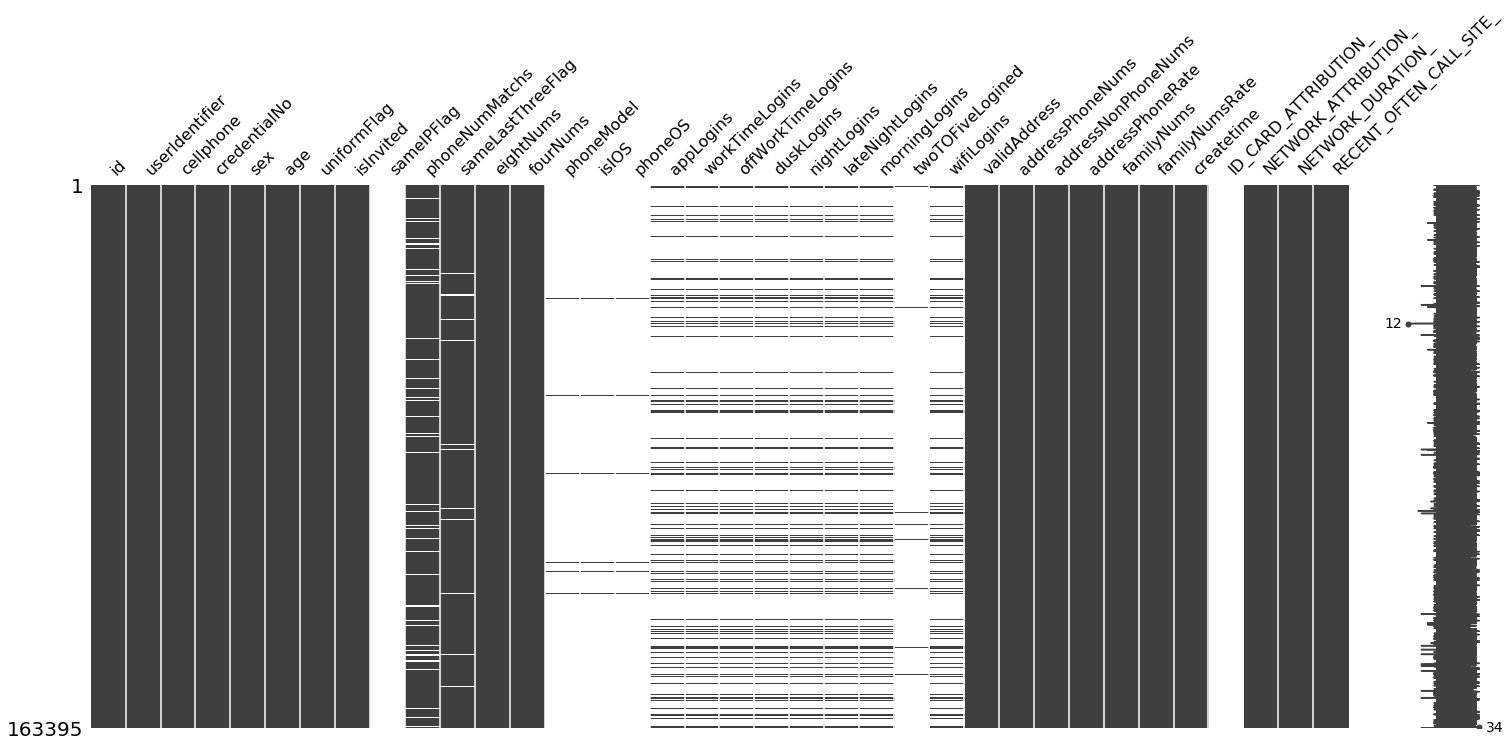

USER_IDENTIFIER_          163385
AVG(DIALING)              163385
AVG(DIALED)               163385
AVG(DIALING_COUNT_)       163385
DIALED_COUNT_             163385
avg_zhujiao               163384
avg_beijiao               163333
avg(TELEPHONE_CHARGE_)    163385
avg(SMS_COUNT_)           163385
yuqi                      163395
first_leadtime            163395
dtype: int64

In [2]:
import pandas as pd
operator_data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
import missingno as missingno
missingno.matrix(extention)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()

In [3]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M:%S").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

F:\anoconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


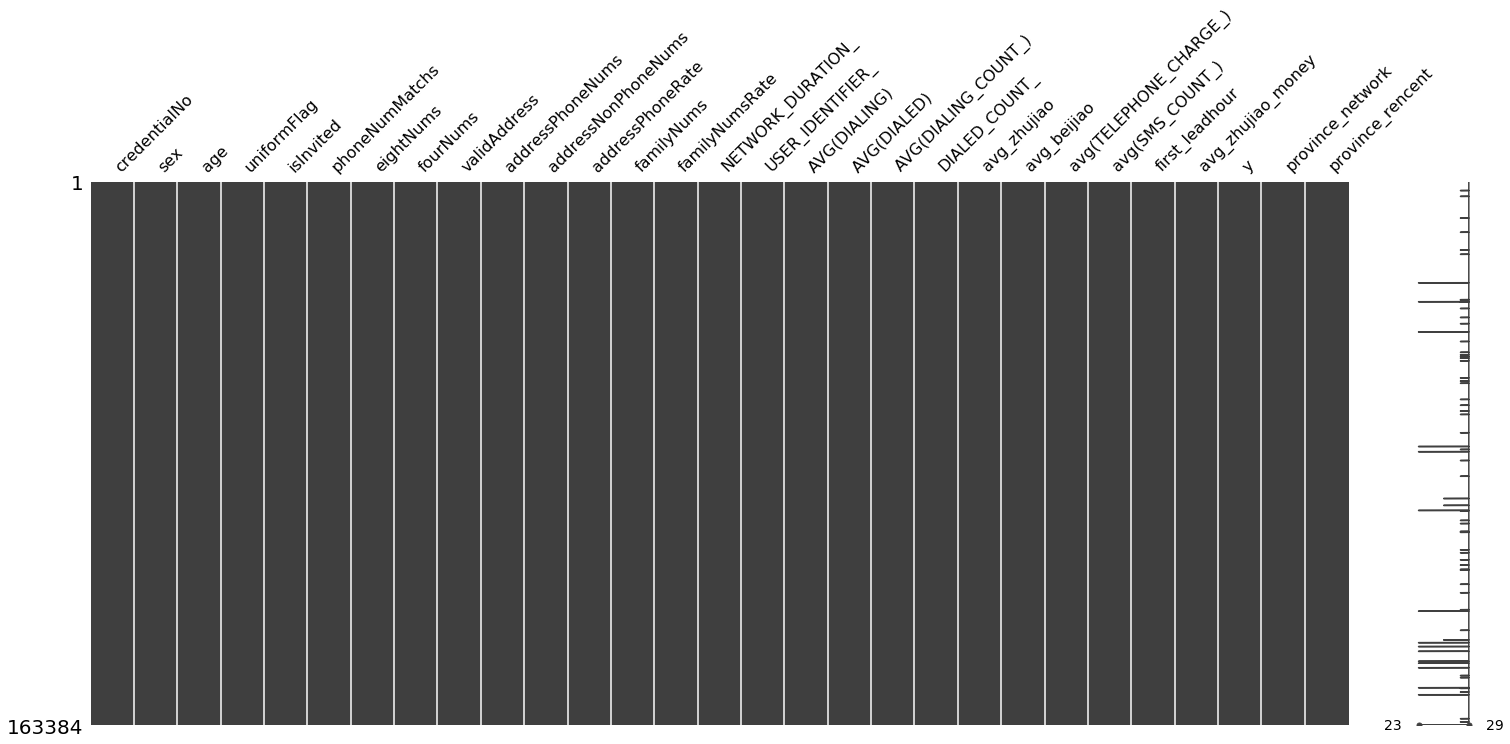

,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [5]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
first_data2

In [6]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2.dropna(axis=0)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [7]:
zhima=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\zhima.csv",sep=",",encoding="gbk")
zhima=zhima[["USER_IDENTIFIER_","zhima"]]
final_data = zhima.merge(first_data2,on="USER_IDENTIFIER_")
# print(final_data.info())
final_data.columns

Index(['USER_IDENTIFIER_', 'zhima', 'credentialNo', 'sex', 'age',
       'uniformFlag', 'isInvited', 'phoneNumMatchs', 'eightNums', 'fourNums',
       'validAddress', 'addressPhoneNums', 'addressNonPhoneNums',
       'addressPhoneRate', 'familyNums', 'familyNumsRate', 'NETWORK_DURATION_',
       'AVG(DIALING)', 'AVG(DIALED)', 'AVG(DIALING_COUNT_)', 'DIALED_COUNT_',
       'avg_zhujiao', 'avg_beijiao', 'avg(TELEPHONE_CHARGE_)',
       'avg(SMS_COUNT_)', 'first_leadhour', 'avg_zhujiao_money', 'y',
       'province_network', 'province_rencent'],
      dtype='object')

## 以上都是数据处理部分，以下开始模型搭建
### 到这里 你如果是个初学者 就开始迷茫了。为什么要分组求IV值讲解（http://blog.csdn.net/kevin7658/article/details/50780391）

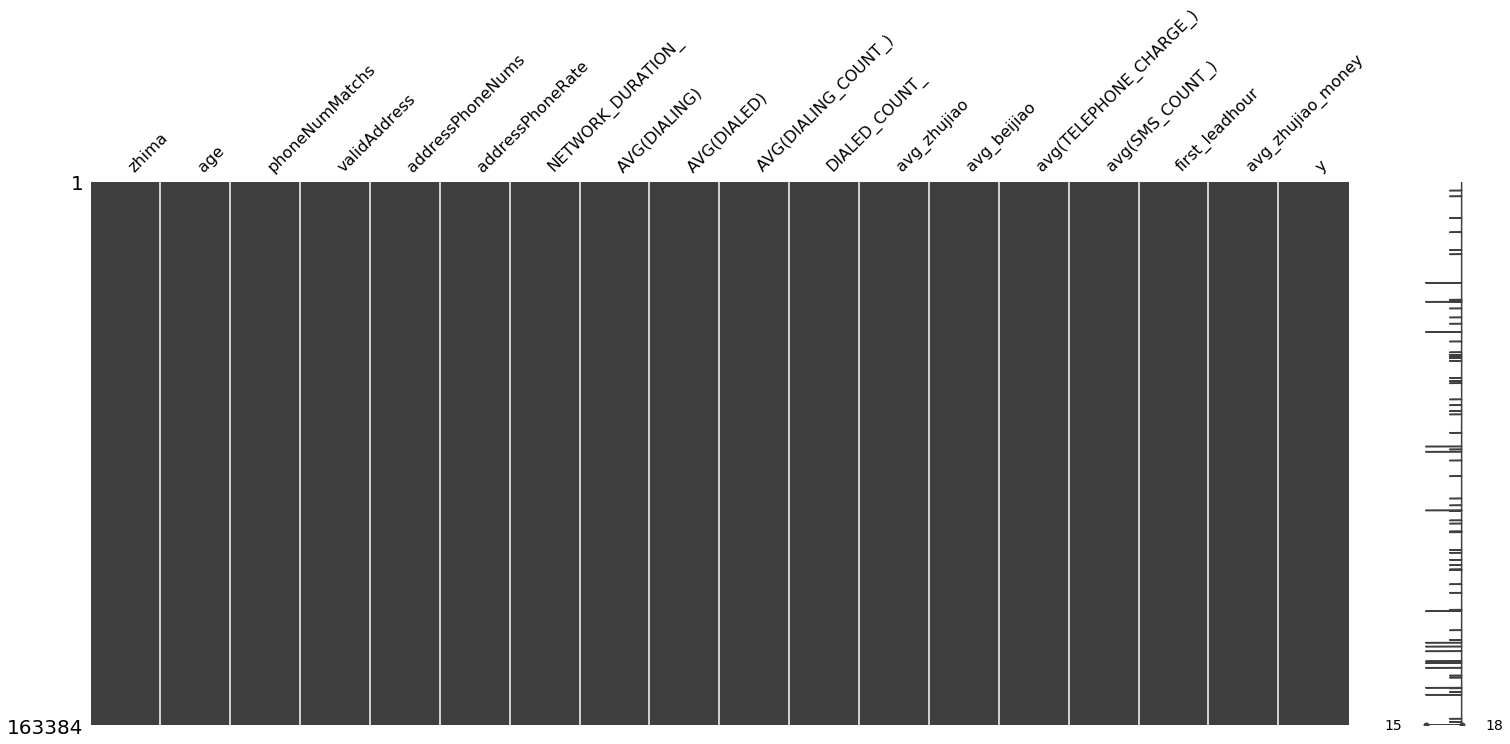

,zhima,age,phoneNumMatchs,validAddress,addressPhoneNums,addressPhoneRate,NETWORK_DURATION_,AVG(DIALING),AVG(DIALED),AVG(DIALING_COUNT_),DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y
0,663,27.0,17.0,49.0,48.0,97.96,44.0,16802.000000,17394.875000,151.8750,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0
1,604,29.0,6.0,32.0,32.0,100.00,14.0,5692.300000,1176.400000,26.5000,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0
2,673,38.0,8.0,138.0,111.0,80.43,95.0,12072.250000,47105.000000,54.5000,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0
3,625,24.0,16.0,160.0,147.0,91.88,31.0,2615.400000,4094.300000,54.7000,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0
4,606,38.0,23.0,909.0,826.0,90.87,82.0,32724.400000,25979.300000,466.0000,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0
5,611,28.0,6.0,218.0,218.0,100.00,119.0,17869.555556,29157.555556,190.5556,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0
6,669,28.0,17.0,145.0,128.0,88.28,49.0,29895.000000,23094.125000,143.3750,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0
7,738,39.0,12.0,117.0,117.0,100.00,80.0,18962.300000,10149.800000,173.1000,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0
8,661,28.0,15.0,75.0,72.0,96.00,100.0,18848.250000,21270.625000,177.5000,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0
9,676,23.0,13.0,129.0,128.0,99.22,10.0,14044.750000,7891.250000,130.2500,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0


In [168]:
plot_data = final_data.drop(["USER_IDENTIFIER_","credentialNo","sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","province_network","province_rencent"],axis=1)
plot_data["zhima"]
missingno.matrix(plot_data)
plot_data

In [176]:
class getIVandKS(object):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    def __init__(self):
        self.result = []
        self.IV = []
        self.KS = []
    def fit(self,x,y):
        x = x.dropna()
        tabel = pd.crosstab(x,y)
        py1 = []
        py0 = []
        for i in list(range(len(tabel))):
            py1 = py1+[tabel.iloc[i,1]/sum(tabel[1])]
            py0 = py0+[tabel.iloc[i,0]/sum(tabel[0])]
        py1 = pd.Series(py1,index = tabel.index)
        py0 = pd.Series(py0,index = tabel.index)
        woe = np.log(py1/py0)
        IV = (py1-py0)*woe
        result = pd.concat([tabel,py1,py0,woe,IV],axis=1)
        result.columns = ["0","1","py1","py0","woe","IV"]
        self.result = result
        self.IV = sum(result["IV"])


In [ ]:
import pandas as pd
def freCut(x,n):
    X =pd.qcut(x,n)
    return X
    

## 寻找好的分组

In [241]:
######cut 有个属性duplicates ='drop' 就是有不平衡情况 删除这个
IV=[]
for i in plot_data.drop(['y'],axis=1).columns:
    IV_i=[]
    print("10000000000000000000000000"+i)
    for j in range(1,12):
        X = pd.qcut(plot_data[i],j,duplicates ='drop')
#         print(X)
#         print(plot_data[i])
        fun =getIVandKS()
        fun.fit(X,plot_data['y'])
        print(fun.IV)
        IV_i += [fun.IV]
    IV += [max(IV_i)]
print(IV)

10000000000000000000000000zhima
0.0
0.259759718998
0.354975465514
0.406882699832
0.45551893865
0.500332255388
0.541255390447
0.563284983209
0.586185127356
0.614164315552
0.641098833362
10000000000000000000000000age
0.0
0.000992097862862
0.000704088032685
0.00142127490493
0.000972292120697
0.00150662109568
0.00123933178084
0.00144735350729
0.00145875810103
0.00147767375003
0.00166544758266
10000000000000000000000000phoneNumMatchs
0.0
0.00270350901333
0.0159081592391
0.0248770270128
0.0352047365852
0.0449072519609
0.0353132149076
0.0454419951598
0.0355223929277
0.224977919685
0.0358193246089
10000000000000000000000000validAddress
0.0
0.0206759747512
0.0238671933537
0.0249470708582
0.0262674003407
0.0273315425955
0.027538672748
0.0276105632826
0.0275237044056
0.0282719334583
0.0285752812347
10000000000000000000000000addressPhoneNums
0.0
0.0207493909577
0.0249525182148
0.0265905276202
0.0280418709703
0.0285671353194
0.0304657265002
0.0298817484133
0.0295446541301
0.0301985675118
0.03099792

In [262]:
params = plot_data.drop(['y'],axis=1).columns
woeTable = pd.concat([pd.Series(IV),pd.Series(params)],axis=1)
woeDataFrame = pd.DataFrame(woeTable)
woeDataFrame.columns=([ 'IV','params'])
woeDataFrame.sort_index(by='IV',ascending=False)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,params
0,0.641099,zhima
2,0.224978,phoneNumMatchs
6,0.049996,NETWORK_DURATION_
4,0.030998,addressPhoneNums
3,0.028575,validAddress
12,0.020156,avg_beijiao
5,0.018774,addressPhoneRate
13,0.017584,avg(TELEPHONE_CHARGE_)
14,0.011250,avg(SMS_COUNT_)
16,0.009661,avg_zhujiao_money


In [268]:
plot_data2 = final_data[["sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","y"]]
IV=[]
for i in plot_data2.drop(['y'],axis=1).columns:
    IV_i=[]
    print("10000000000000000000000000"+i)
    for j in range(1,12):
        X = pd.qcut(plot_data2[i],j,duplicates ='drop')
#         print(X)
#         print(plot_data[i])
        fun =getIVandKS()
        fun.fit(X,plot_data['y'])
        print(fun.IV)
        IV_i += [fun.IV]
    IV += [max(IV_i)]
print(IV)

10000000000000000000000000sex
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000uniformFlag
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000isInvited
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000eightNums
0.0
1.27891674592e-08
1.27891674592e-08
1.27891674592e-08
0.000118577814545
0.000118577814545
0.000118577814545
0.000118577814545
0.000118577814545
0.000118577814545
0.000118577814545
10000000000000000000000000fourNums
0.0
0.0
0.000183157073306
0.000183157073306
0.000183157073306
0.000183157073306
0.000183157073306
0.000183157073306
0.000775276788457
0.000775276788457
0.000775276788457
10000000000000000000000000addressNonPhoneNums
0.0
7.77068945302e-06
0.00129592661419
0.00182642109918
0.00200275283259
0.0022485516982
0.00229599407812
0.00254758784566
0.00250384167314
0.00251490952826
0.00257774585759
10000000000000000000000000familyNums
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000familyNumsRa

In [266]:
params2 = plot_data2.drop(['y'],axis=1).columns
woeTable2 = pd.concat([pd.Series(IV),pd.Series(params2)],axis=1)
woeDataFrame2 = pd.DataFrame(woeTable2)
woeDataFrame2.columns=([ 'IV','params'])
woeDataFrame2.sort_index(by='IV',ascending=False)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,params
5,0.002578,addressNonPhoneNums
4,0.000775,fourNums
3,0.000119,eightNums
0,0.000000,sex
1,0.000000,uniformFlag
2,0.000000,isInvited
6,0.000000,familyNums
7,0.000000,familyNumsRate


In [269]:
plot_data2["sex"]

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
5         1.0
6         0.0
7         1.0
8         1.0
9         0.0
10        1.0
11        0.0
12        0.0
13        1.0
14        0.0
15        0.0
16        0.0
17        0.0
18        1.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
163354    1.0
163355    0.0
163356    0.0
163357    1.0
163358    0.0
163359    0.0
163360    1.0
163361    0.0
163362    0.0
163363    0.0
163364    0.0
163365    0.0
163366    0.0
163367    0.0
163368    0.0
163369    0.0
163370    0.0
163371    0.0
163372    0.0
163373    0.0
163374    0.0
163375    0.0
163376    0.0
163377    0.0
163378    1.0
163379    0.0
163380    0.0
163381    1.0
163382    0.0
163383    0.0
Name: sex, Length: 163384, dtype: float64

## 下面这段代码和以上以下都无关，插播一个例子，用于对IV和woe不懂的人看，这是一个求woe值和IV值得过程，主要对一组X值和一组Y值整合求IV，最终求IV的和 来判定这个特征对Y的作用到底有多大。IV的和大于0.2为比较有明显作用。

In [152]:
from pandas import Series,DataFrame
import numpy as np
x = DataFrame([1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2],index = range(20),columns=['x'])
x['index']=x.index
y = DataFrame([0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,1],index = range(20),columns=['y'])
y['index']=y.index
croXY = pd.merge(x,y).drop(['index'],axis=1)
per = np.array(list(range(5)))
per =per*100/4*1.0
per[4]=100
res = np.percentile(croXY['x'],q=per)
res[4]=np.inf
res[0]=-np.inf
res
X = pd.cut(croXY['x'],res)
croXY['x']
py1=[]
py0=[]
print(X)
table = pd.crosstab(X,croXY['y'])
print(table)
for k in list(range(len(table))):
    py1 = py1+[table.iloc[k,1]/sum(table[1])]
    py0 = py0+[table.iloc[k,0]/sum(table[0])]
py1 = Series(py1,index= table.index)
py0 = Series(py0,index= table.index)
woe=np.log(py1/py0)
IV=(py1-py0)*woe
IV
result = pd.concat([table,py1,py0,woe,IV],axis=1)
result.columns =['0','1','py1','py0','woe','IV']
result
IVsum = sum(result['IV'])
result
# crosstab的讲解（http://blog.csdn.net/alanguoo/article/details/52330404 ）
#（IV和woe讲解）


0     (-inf, 1.0]
1      (1.0, 2.0]
2      (2.0, 3.0]
3     (-inf, 1.0]
4      (1.0, 2.0]
5      (2.0, 3.0]
6     (-inf, 1.0]
7      (1.0, 2.0]
8      (2.0, 3.0]
9     (-inf, 1.0]
10     (1.0, 2.0]
11     (2.0, 3.0]
12    (-inf, 1.0]
13     (1.0, 2.0]
14     (2.0, 3.0]
15    (-inf, 1.0]
16     (1.0, 2.0]
17     (2.0, 3.0]
18    (-inf, 1.0]
19     (1.0, 2.0]
Name: x, dtype: category
Categories (4, interval[float64]): [(-inf, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, inf]]
y            0  1
x                
(-inf, 1.0]  5  2
(1.0, 2.0]   1  6
(2.0, 3.0]   2  4
(3.0, inf]   0  0


,0,1,py1,py0,woe,IV
x,,,,,,
"(-inf, 1.0]",5,2,0.166667,0.625,-1.321756,0.605805
"(1.0, 2.0]",1,6,0.500000,0.125,1.386294,0.519860
"(2.0, 3.0]",2,4,0.333333,0.250,0.287682,0.023974
"(3.0, inf]",0,0,0.000000,0.000,NaN,NaN


In [228]:
import pandas as pd
from pandas import Series,DataFrame
def freCut(x,n):
    X =pd.qcut(x,n,duplicates ='drop')
    return X
xxx =pd.Series([1,2,3,2,3,4,3,4,5,5,5,5,5,5],index=range(14))
freCut(xxx,3)

0     (0.999, 3.0]
1     (0.999, 3.0]
2     (0.999, 3.0]
3     (0.999, 3.0]
4     (0.999, 3.0]
5       (3.0, 5.0]
6     (0.999, 3.0]
7       (3.0, 5.0]
8       (3.0, 5.0]
9       (3.0, 5.0]
10      (3.0, 5.0]
11      (3.0, 5.0]
12      (3.0, 5.0]
13      (3.0, 5.0]
dtype: category
Categories (2, interval[float64]): [(0.999, 3.0] < (3.0, 5.0]]

In [285]:
import numpy as np  
import matplotlib.pyplot as plt  
n = 12  
# 生成一个1-12的列表，不包括12，[ 0  1  2  3  4  5  6  7  8  9 10 11]  
x = np.arange(n)  
print(x)
# np.random.uniform(0.5,1.0,n),生成n个0.5-1.0之间的随机数  
y1 = 3 * np.random.uniform(0.5,1.0,n)  
print(y1)
y2 = 3 * np.random.uniform(0.5,1.0,n)  
  
# 生成一个包含有n个值，均为0.2的list，表示允许的误差范围[-0.2,0.2]  
error = [0.2,] * n  
print(error)
  
# bar(left, height, width=0.8, bottom=None, hold=None, **kwargs)  
# 绘制柱形图  
# left:柱形图的x坐标  
# height柱形图的高度，以0.0为基准  
# width:柱形图的宽度，默认0.8  
# facecolor:颜色  
# edgecolor:边框颜色n  
# bottom:表示底部从y轴的哪个刻度开始画  
# yerr:应该是对应的数据的误差范围，加上这个参数，柱状图头部会有一个蓝色的范围标识,标出允许的误差范围,在水平柱状图中这个参数为xerr  
plt.bar(x,+y1,width=0.8,facecolor="#9666ff",edgecolor="white",yerr=error)  
plt.bar(x,-y2,facecolor="#ff9999",edgecolor="white")  
# 绘制文字，显示柱状图形的值  
for x,y1,y2 in zip(x,y1,y2):  
    plt.text(x+0.4,y1+0.05,'%.2f' % y1,ha='center',va='bottom')  
    plt.text(x+0.4,-(y2+0.05),'%.2f' % y2,ha='center',va='top')  
print(zip(x,y1,y2))
plt.ylim(-3.5,3.5)  
plt.show()  

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 1.94532171  2.15940297  2.75162545  1.58298563  2.33158377  2.46053574
  1.69206824  2.72901825  1.61146057  1.9373683   2.66804721  2.78512446]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


TypeError: zip argument #1 must support iteration